In [111]:
import sys
import os
from dotenv import load_dotenv
import pandas as pd

#1. load environment variables and data

# load environment variables
load_dotenv()

#add working directory to sys path to execute utils/dataset.py
working_dir = os.environ.get("WORKING_DIRECTORY")
sys.path.insert(0, working_dir)

In [112]:
#load data from csv
#/data/processed/wine-z.csv
df = pd.read_csv(os.path.join(working_dir, "data", "processed", "wine-z.csv"))
df_o = df

In [113]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000,7206.000000
mean,6.843172,0.270905,0.327169,6.388329,49.546253,935.313328,285.973211,236.426958,0.043154,34.661255,137.526367,0.993959,3.186767,0.485801,10.536582,5.773800
std,0.788465,0.085074,0.100968,4.955919,29.049169,267.527407,75.462053,69.979704,0.011791,15.486201,41.469606,0.002911,0.141836,0.105767,1.221045,1.127863
min,4.400000,0.080000,0.000000,0.600000,0.035118,147.340000,61.656005,30.080000,0.012000,2.000000,19.000000,0.987130,2.790000,0.220000,8.400000,1.000000
25%,6.300000,0.210000,0.270000,1.700000,24.537694,748.570000,234.222096,187.715000,0.035000,23.000000,107.000000,0.991650,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,49.234554,933.850000,285.252957,236.020000,0.043000,33.000000,134.000000,0.993660,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.380000,9.800000,74.812891,1118.885000,337.936455,284.275000,0.050000,45.000000,167.000000,0.996075,3.280000,0.540000,11.400000,6.000000
max,9.300000,0.570000,0.690000,20.800000,99.998181,1736.640000,516.305244,447.350000,0.112000,86.000000,260.000000,1.001960,3.630000,0.830000,14.000000,9.000000


In [114]:
df.head()

,wine type,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,Pinot noir,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,21.0,98.0,0.99290,3.19,0.48,9.2,5
1,Merlot,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,15.0,68.0,0.99163,2.96,0.52,11.1,6
2,Chardonnay,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,45.0,123.0,0.98949,3.24,0.36,12.6,7
3,Merlot,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,48.0,253.0,1.00014,3.02,0.56,9.1,6
4,Merlot,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,62.0,150.0,0.99508,3.23,0.37,10.0,6


# 2: Feature Selection

In [115]:
#transform categorical feature (wine type) to numerical using one-hot encoding
df = pd.get_dummies(df, columns=["wine type"])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,...,density,pH,sulphates,alcohol,quality,wine type_Cabernet Sauvignon,wine type_Chardonnay,wine type_Gamay,wine type_Merlot,wine type_Pinot noir
0,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,21.0,...,0.99290,3.19,0.48,9.2,5,0,0,0,0,1
1,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,15.0,...,0.99163,2.96,0.52,11.1,6,0,0,0,1,0
2,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,45.0,...,0.98949,3.24,0.36,12.6,7,0,1,0,0,0
3,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,48.0,...,1.00014,3.02,0.56,9.1,6,0,0,0,1,0
4,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,62.0,...,0.99508,3.23,0.37,10.0,6,0,0,0,1,0


## 2.1 using Correlation

In [116]:
#Correlation Analysis
#use correlation analysis to identify features that are highly correlated with the label (quality) and remove the features that are weakly correlated or not correlated. 
#This is done to reduce the number of features and to avoid multicollinearity.

#caluclate correlation of only the numeric features with label (quality)
corr = df.corr()["quality"].abs().sort_values(ascending=False)
corr



quality                         1.000000
wine type_Gamay                 0.649288
alcohol                         0.309699
density                         0.215224
chlorides                       0.201905
total sulfur dioxide            0.100442
pH                              0.098707
wine type_Merlot                0.096340
volatile acidity                0.082501
residual sugar                  0.075629
fixed acidity                   0.070222
wine type_Chardonnay            0.066997
wine type_Cabernet Sauvignon    0.062561
magnesium                       0.038936
wine type_Pinot noir            0.035515
minerals                        0.035381
calcium                         0.021990
free sulfur dioxide             0.018744
sulphates                       0.009000
citric acid                     0.006355
flavanoids                      0.006022
Name: quality, dtype: float64

In [117]:
#keep 10 best numeric features in df
df_corr10 = df[corr[:11].index]
df_corr10.head()


,quality,wine type_Gamay,alcohol,density,chlorides,total sulfur dioxide,pH,wine type_Merlot,volatile acidity,residual sugar,fixed acidity
0,5,0,9.2,0.99290,0.048,98.0,3.19,0,0.15,1.1,5.8
1,6,0,11.1,0.99163,0.039,68.0,2.96,1,0.25,5.6,6.6
2,7,0,12.6,0.98949,0.035,123.0,3.24,0,0.21,1.5,6.7
3,6,0,9.1,1.00014,0.045,253.0,3.02,1,0.28,17.5,8.3
4,6,0,10.0,0.99508,0.041,150.0,3.23,1,0.42,6.9,7.5


## 2.1 using Univerate Feature Selection

In [118]:
#Univariate Feature Selection
#use statistical chi-squared test to select the features that are most relevant to the label (quality). use scikit-learn's SelectKBest() function to select the k best features based on the test score.

#split data into features and label
X = df.drop("quality", axis=1)
y = df["quality"]

#for features we only keep the numeric features
X = X.select_dtypes(include=["float64", "int64"])

#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ["Specs", "Score"]  #naming the dataframe columns
featureScores.nlargest(10, "Score")  #print 10 best features

,Specs,Score
10,total sulfur dioxide,3543.645939
9,free sulfur dioxide,928.392572
5,flavanoids,691.470505
6,minerals,649.063015
3,residual sugar,517.914075
4,magnesium,513.717188
7,calcium,423.416174
14,alcohol,211.704213
1,volatile acidity,8.556870
0,fixed acidity,8.086117


In [119]:
#keep 10 best numeric features in df_chi2 - keep the label (quality) as well
df_chi2 = df[featureScores.nlargest(10, "Score")["Specs"].values]
#add label (quality) to df_chi2
df_chi2["quality"] = df["quality"]
#move label (quality) to first column
df_chi2 = df_chi2[["quality"] + list(df_chi2.columns[:-1])]
df_chi2.head()

C:\Users\LucaH\AppData\Local\Temp\ipykernel_19252\3637623998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_chi2["quality"] = df["quality"]


,quality,total sulfur dioxide,free sulfur dioxide,flavanoids,minerals,residual sugar,magnesium,calcium,alcohol,volatile acidity,fixed acidity
0,5,98.0,21.0,894.94,186.639301,1.1,76.729301,109.91,9.2,0.15,5.8
1,6,68.0,15.0,1160.95,251.875712,5.6,4.795712,247.08,11.1,0.25,6.6
2,7,123.0,45.0,789.82,304.703710,1.5,85.193710,219.51,12.6,0.21,6.7
3,6,253.0,48.0,777.86,237.586525,17.5,11.976525,225.61,9.1,0.28,8.3
4,6,150.0,62.0,785.72,95.399673,6.9,5.599673,89.80,10.0,0.42,7.5


Correlation Analysis
Univariate Feature Selection


array([[<Axes: xlabel='quality', ylabel='quality'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='quality'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='quality'>,
        <Axes: xlabel='flavanoids', ylabel='quality'>,
        <Axes: xlabel='minerals', ylabel='quality'>,
        <Axes: xlabel='residual sugar', ylabel='quality'>,
        <Axes: xlabel='magnesium', ylabel='quality'>,
        <Axes: xlabel='calcium', ylabel='quality'>,
        <Axes: xlabel='alcohol', ylabel='quality'>,
        <Axes: xlabel='volatile acidity', ylabel='quality'>,
        <Axes: xlabel='fixed acidity', ylabel='quality'>],
       [<Axes: xlabel='quality', ylabel='total sulfur dioxide'>,
        <Axes: xlabel='total sulfur dioxide', ylabel='total sulfur dioxide'>,
        <Axes: xlabel='free sulfur dioxide', ylabel='total sulfur dioxide'>,
        <Axes: xlabel='flavanoids', ylabel='total sulfur dioxide'>,
        <Axes: xlabel='minerals', ylabel='total sulfur dioxide'>,
        <Axes: xlabe

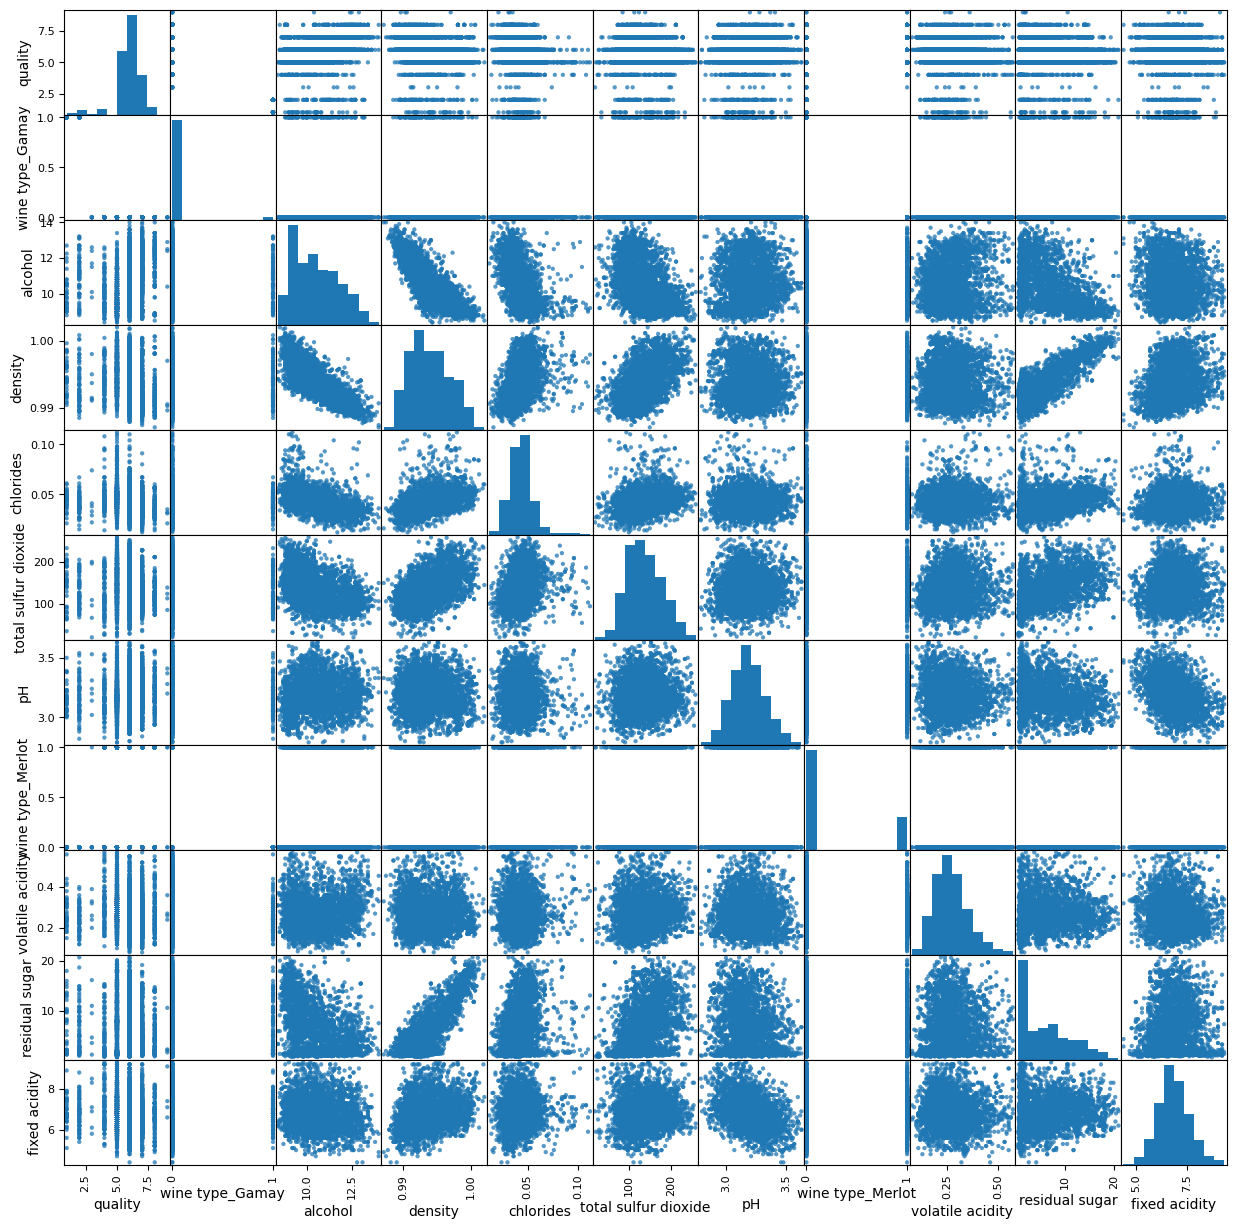

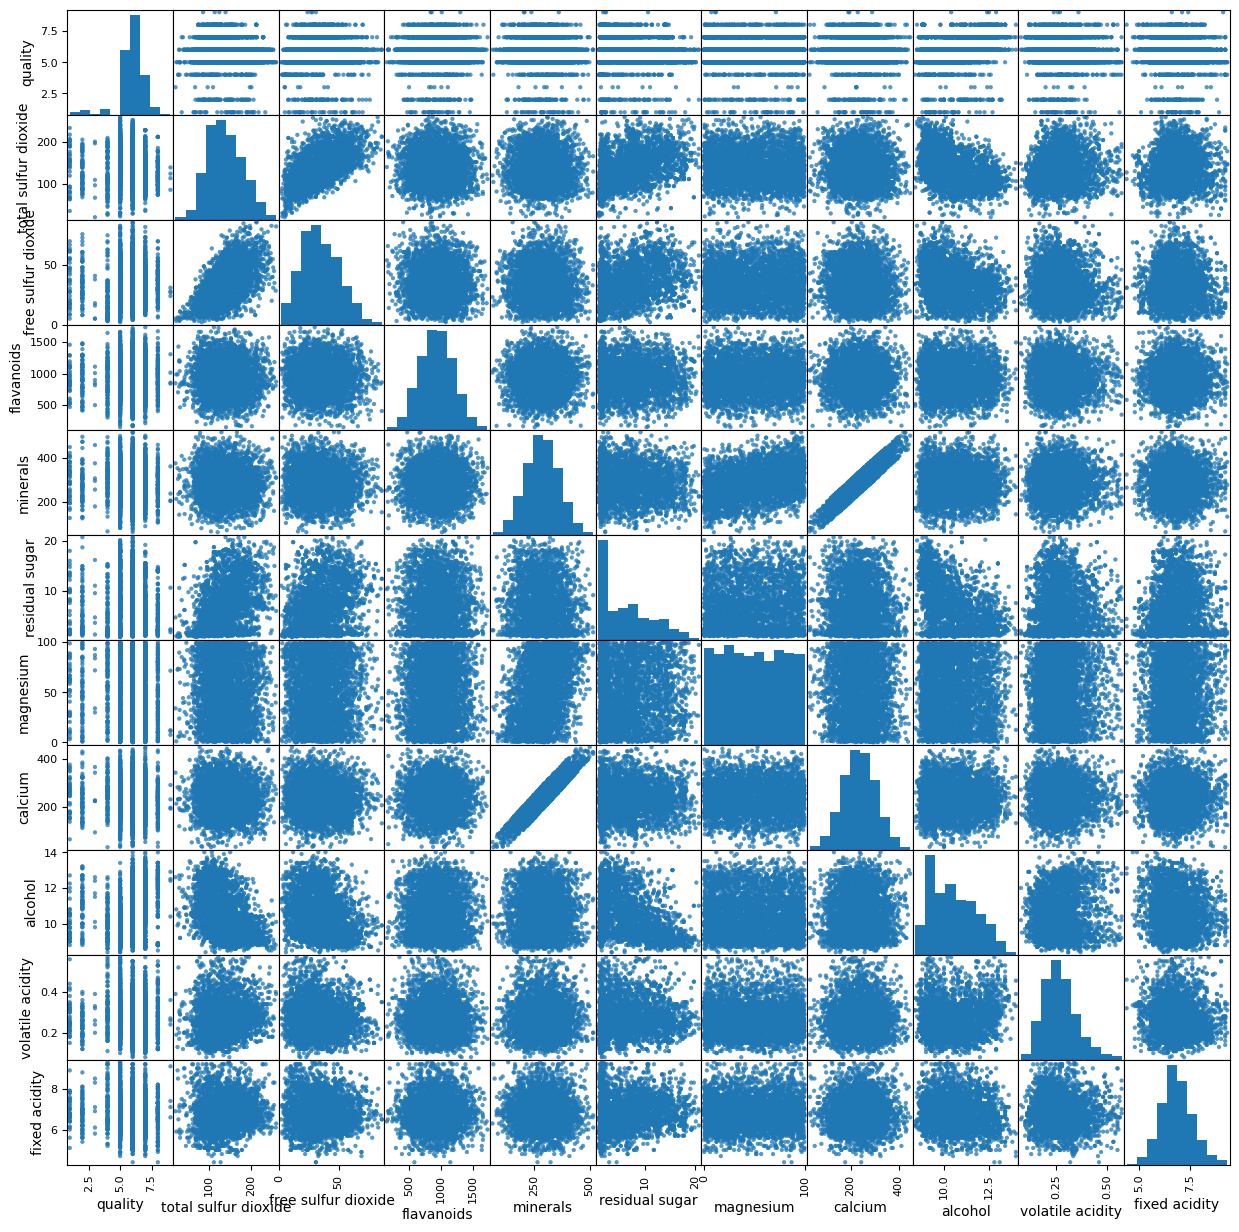

In [120]:
#visualize the dataset using a scatter plot matrix
from pandas.plotting import scatter_matrix

print("Correlation Analysis")
scatter_matrix(df_corr10, figsize=(15, 15))

print("Univariate Feature Selection")
scatter_matrix(df_chi2, figsize=(15, 15))


## Quantile Transformation

Correlation Analysis
Univariate Feature Selection


array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>,
        <Axes: xlabel='4', ylabel='0'>, <Axes: xlabel='5', ylabel='0'>,
        <Axes: xlabel='6', ylabel='0'>, <Axes: xlabel='7', ylabel='0'>,
        <Axes: xlabel='8', ylabel='0'>, <Axes: xlabel='9', ylabel='0'>,
        <Axes: xlabel='10', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>,
        <Axes: xlabel='4', ylabel='1'>, <Axes: xlabel='5', ylabel='1'>,
        <Axes: xlabel='6', ylabel='1'>, <Axes: xlabel='7', ylabel='1'>,
        <Axes: xlabel='8', ylabel='1'>, <Axes: xlabel='9', ylabel='1'>,
        <Axes: xlabel='10', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>,
        <Axes: xlabel='4', ylabel='2'>, <Axes: xlabe

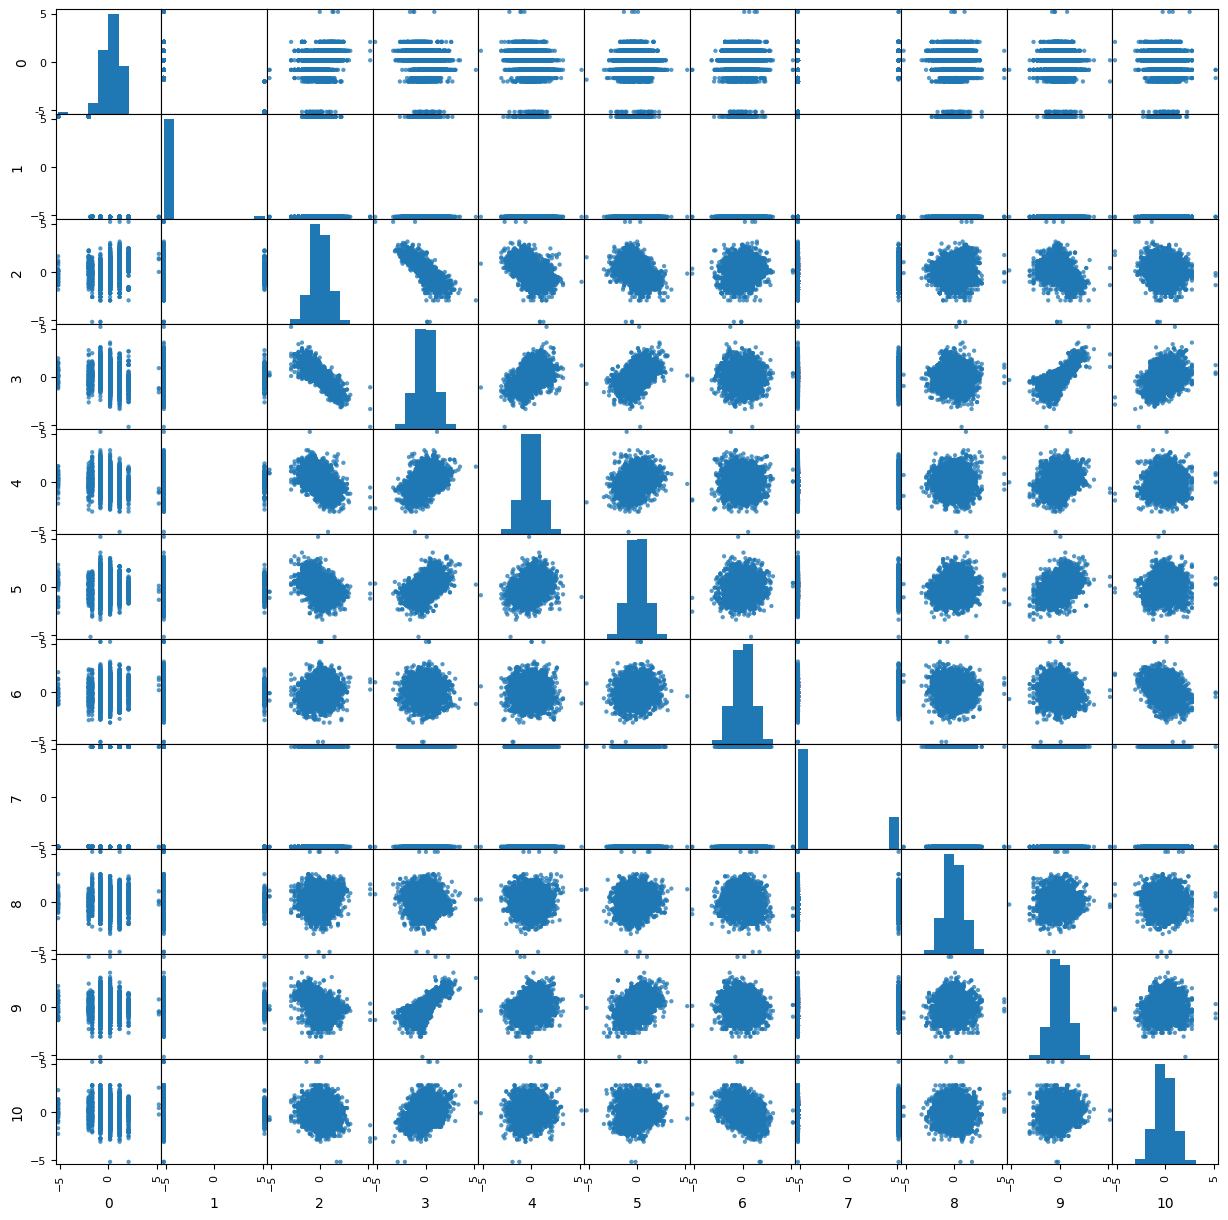

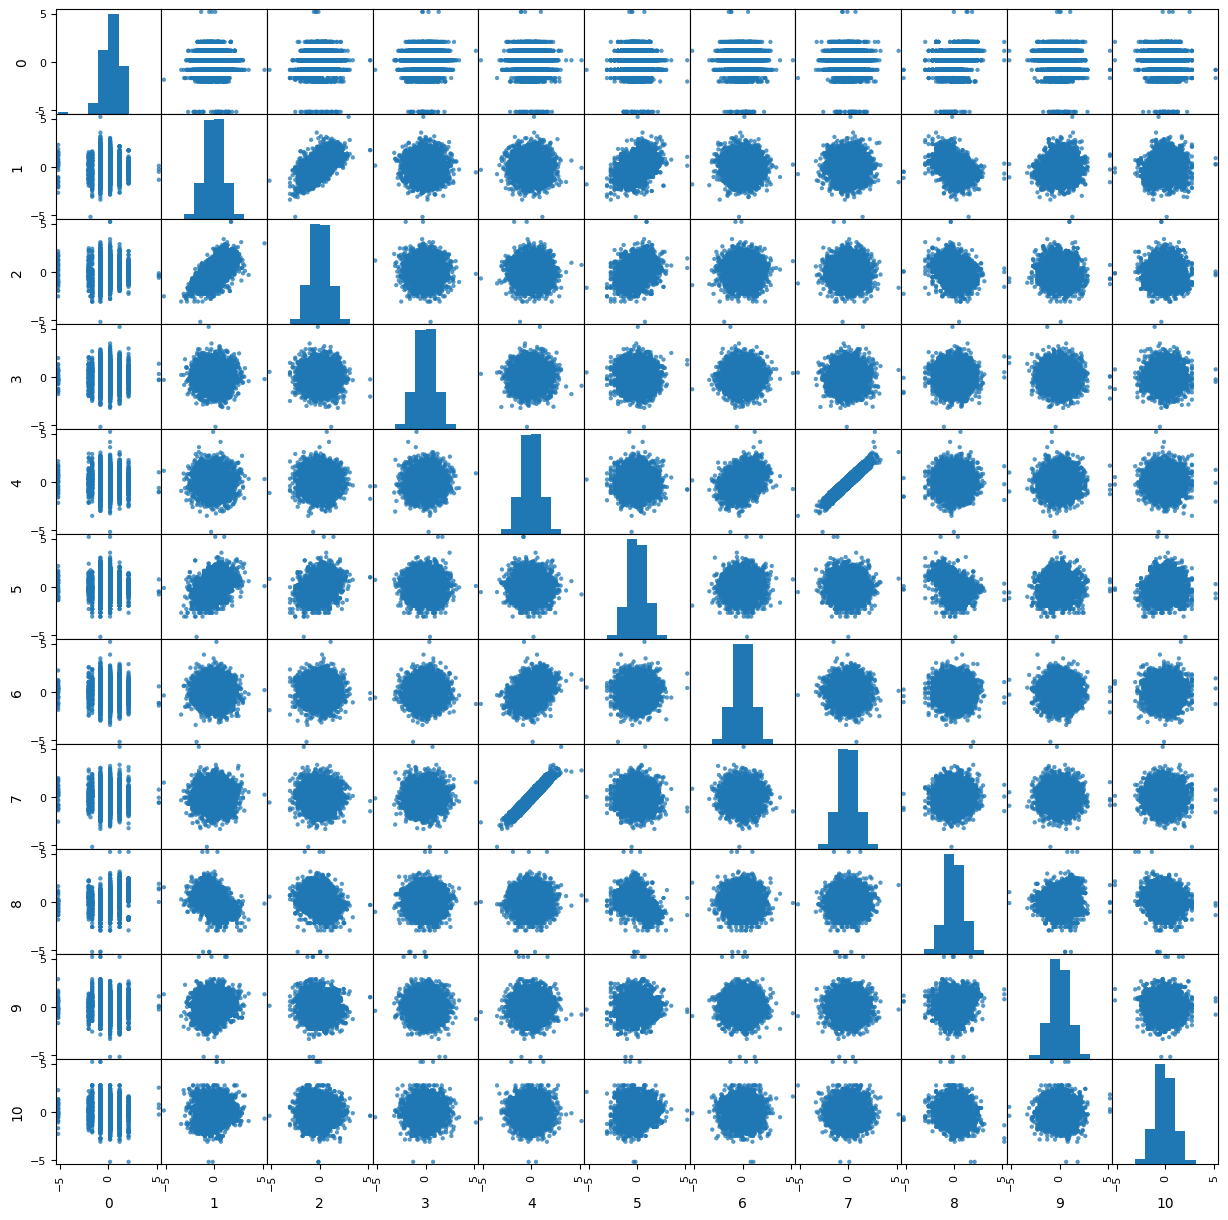

In [121]:
# perform Quantile Transformation to transform the features to follow a normal distribution
from sklearn.preprocessing import QuantileTransformer

#transform the features
transformer = QuantileTransformer(output_distribution="normal")
df_corr10_norm = transformer.fit_transform(df_corr10)
df_chi2_norm = transformer.fit_transform(df_chi2)

#visualize the dataset using a scatter plot matrix
print("Correlation Analysis")
scatter_matrix(pd.DataFrame(df_corr10_norm), figsize=(15, 15))

print("Univariate Feature Selection")
scatter_matrix(pd.DataFrame(df_chi2_norm), figsize=(15, 15))

# 3: Dimensionality Reduction

Explained Variance: [0.31326955 0.13467357 0.11059952 0.1063749  0.0913312  0.07667693
 0.06559998 0.05416565 0.04249527 0.00481344]


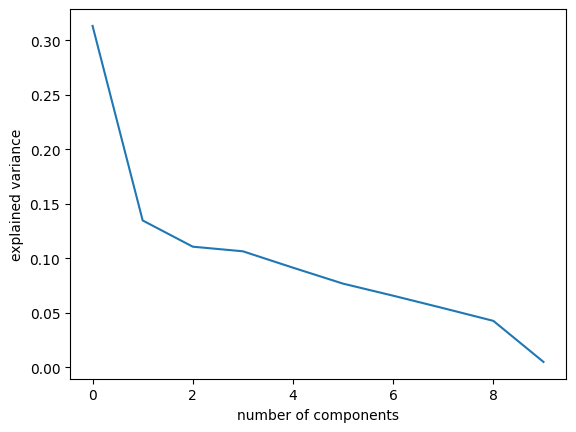

In [122]:
#dimensionality reduction
#use principal component analysis (PCA) to reduce the number of features. PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.


df_corr10_norm = pd.DataFrame(df_corr10_norm, columns=df_corr10.columns)
df_chi2_norm = pd.DataFrame(df_chi2_norm, columns=df_chi2.columns)


#split data into features and label

X = df_corr10_norm.drop("quality", axis=1)
y = df_corr10_norm["quality"]

#for features we only keep the numeric features
X = X.select_dtypes(include=["float64", "int64"])

#scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

#apply PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
fit = pca.fit(X)

#summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)


#visualize the explained variance
import matplotlib.pyplot as plt

plt.plot(fit.explained_variance_ratio_)
plt.xlabel("number of components")
plt.ylabel("explained variance")
plt.show()


In [123]:
#reading the graph the elbow is at 8 components
#apply PCA with 8 components
pca = PCA(n_components=2)
fit = pca.fit(X)
data_pca = pca.transform(X)
data_pca = pd.DataFrame(data_pca, columns=["PC1", "PC2"])

data_pca.head()


,PC1,PC2
0,0.743092,-0.657341
1,1.272958,1.410131
2,2.445988,0.009688
3,-4.195069,0.893165
4,-0.583755,0.000788


In [124]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,magnesium,flavanoids,minerals,calcium,chlorides,free sulfur dioxide,...,density,pH,sulphates,alcohol,quality,wine type_Cabernet Sauvignon,wine type_Chardonnay,wine type_Gamay,wine type_Merlot,wine type_Pinot noir
0,5.8,0.15,0.49,1.1,76.729301,894.94,186.639301,109.91,0.048,21.0,...,0.99290,3.19,0.48,9.2,5,0,0,0,0,1
1,6.6,0.25,0.32,5.6,4.795712,1160.95,251.875712,247.08,0.039,15.0,...,0.99163,2.96,0.52,11.1,6,0,0,0,1,0
2,6.7,0.21,0.34,1.5,85.193710,789.82,304.703710,219.51,0.035,45.0,...,0.98949,3.24,0.36,12.6,7,0,1,0,0,0
3,8.3,0.28,0.27,17.5,11.976525,777.86,237.586525,225.61,0.045,48.0,...,1.00014,3.02,0.56,9.1,6,0,0,0,1,0
4,7.5,0.42,0.19,6.9,5.599673,785.72,95.399673,89.80,0.041,62.0,...,0.99508,3.23,0.37,10.0,6,0,0,0,1,0


In [139]:
#add the categorical feature (wine type) to the data_pca dataframe
data_pca["wine type"] = df_o["wine type"]

#transform categorical feature (wine type) to numerical 1-5
data_pca["wine type"] = data_pca["wine type"].map({"Chardonnay": 1, "Cabernet Sauvignon": 2, "Merlot": 3, "Pinot noir": 4, "Gamay": 5})

Correlation Analysis


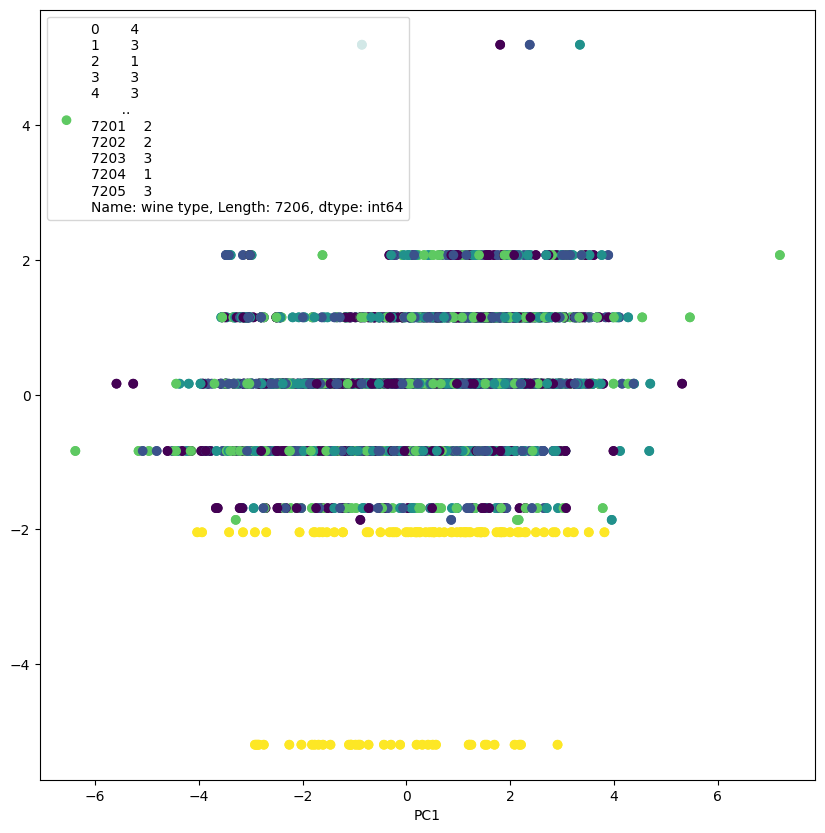

In [143]:
#visualize the dataset using a scatter plot 
#color the data points by the categorial label (wine type)
#show legend for the colors
print("Correlation Analysis")
plt.figure(figsize=(10, 10))
plt.scatter(data_pca["PC1"], y, c=data_pca["wine type"], cmap="viridis", label=data_pca["wine type"])
plt.xlabel("PC1")
plt.legend()
plt.show()


In [144]:
y.head()

0   -0.835558
1    0.163824
2    1.149742
3    0.163824
4    0.163824
Name: quality, dtype: float64

<Axes: >

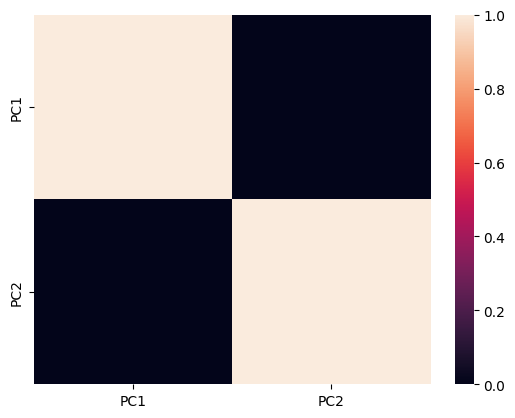

In [69]:
import seaborn as sns
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

In [70]:
data_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7206 entries, 0 to 7205
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     7206 non-null   float64
 1   PC2     7206 non-null   float64
dtypes: float64(2)
memory usage: 112.7 KB
